In [4]:
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import random
import math

sb.set_style("white")

wheres_waldo_locations = pd.read_csv("wheres-waldo-locations.csv")
wheres_waldo_locations.describe()

,Book,Page,X,Y
count,68.000000,68.000000,68.000000,68.000000
mean,3.514706,6.058824,6.700776,3.875306
std,1.856756,3.411492,3.703276,1.941349
min,1.000000,1.000000,0.625000,0.333333
25%,2.000000,3.000000,3.513889,2.250000
50%,3.000000,6.000000,6.694444,3.927083
75%,5.000000,9.000000,10.062500,5.291667
max,7.000000,12.000000,12.444444,7.708333


''

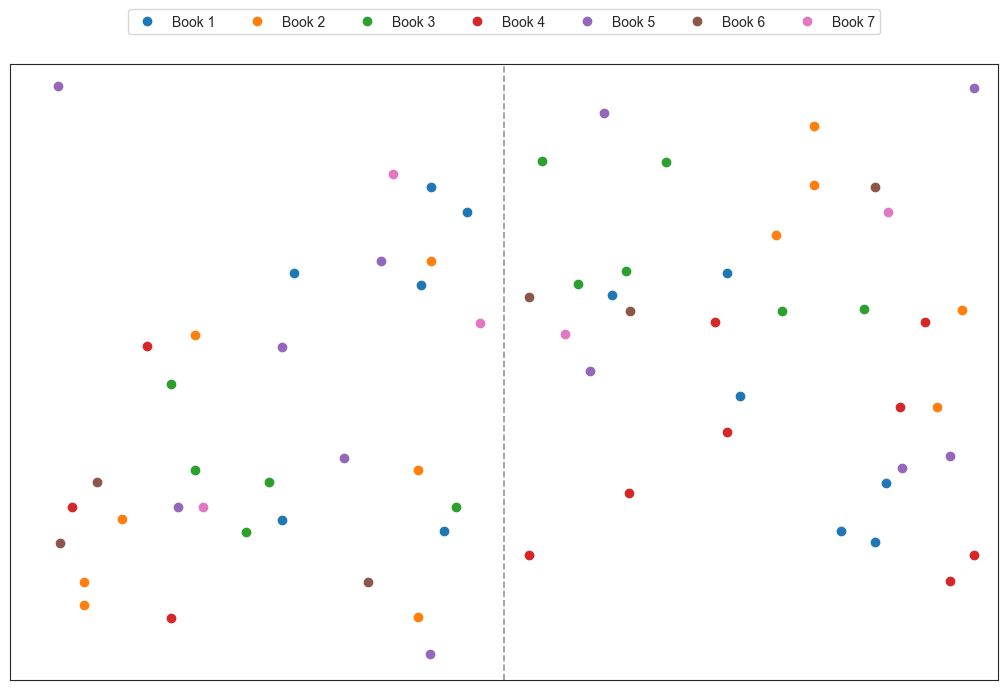

In [5]:
plt.figure(figsize=(12.75, 8))
plt.plot([6.375, 6.375], [0, 8], "--", color="black", alpha=0.4, lw=1.25)

for book, group in wheres_waldo_locations.groupby("Book"):
    plt.plot(group.X, group.Y, "o", label="Book %d" % (book))

plt.xlim(0, 12.75)
plt.ylim(0, 8)
plt.xticks([])
plt.yticks([])
plt.legend(loc="upper center", ncol=7, frameon=True, fancybox=True, bbox_to_anchor=(0.5, 1.1))
;



/var/folders/r0/njkyt5p90c7bghpb3l01cr840000gn/T/ipykernel_28766/1201581414.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(data=wheres_waldo_locations, x="X", y="Y", shade=True, cmap="Blues")


''

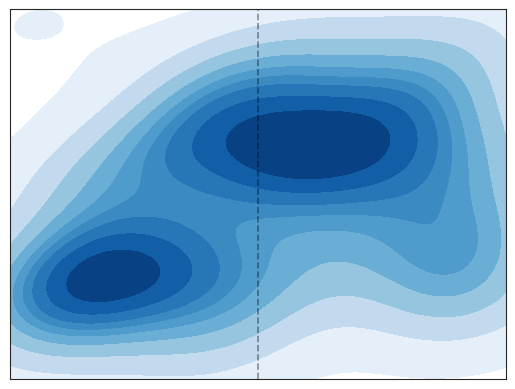

In [6]:

sb.kdeplot(data=wheres_waldo_locations, x="X", y="Y", shade=True, cmap="Blues")
plt.plot([6.375, 6.375], [0, 8], "--", color="black", alpha=0.4, lw=1.25)
plt.xlim(0, 12.75)
plt.ylim(0, 8)
plt.xlabel("")
plt.ylabel("")
plt.xticks([])
plt.yticks([])
;

In [7]:
waldo_location_map = {}

for i, record in wheres_waldo_locations.iterrows():
    key = "B%dP%d" % (record.Book, record.Page)
    waldo_location_map[key] = (record.X, record.Y)